In [17]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
indir = '/home/hsher/scratch/circSTAMP_pipe/output/'
circ_quant_output = [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]

In [2]:
def read_ciri_gtf(fname):
    bed = BedTool(fname)
    df = bed.to_dataframe()
    # filter for non-entries
    df = df.loc[~df['seqname'].str.contains('##')].reset_index()
    
    # get attributes
    attrs = pd.DataFrame([i.attrs for i in bed])
    
    return pd.concat([df, attrs], axis = 1)

In [5]:
circ_type_count = []
names = []
junc_ratio_tbl = []
bsj_ratio_tbl = []
fsj_ratio_tbl = []
for fname in circ_quant_output:
    name = os.path.basename(fname).replace('.gtf', '')
    names.append(name)
    
    circ_df = read_ciri_gtf(fname)
    print(fname)
    circ_type_count.append(circ_df['circ_type'].value_counts())
    
    junc_ratio_tbl.append(circ_df.set_index('circ_id')['junc_ratio'].astype(float))
    bsj_ratio_tbl.append(circ_df.set_index('circ_id')['bsj'].astype(float))
    fsj_ratio_tbl.append(circ_df.set_index('circ_id')['fsj'].astype(float))

/home/hsher/scratch/circSTAMP_pipe/output/APO-noD-R.gtf
/home/hsher/scratch/circSTAMP_pipe/output/HuR-1-R.gtf
/home/hsher/scratch/circSTAMP_pipe/output/APO-1-R.gtf
/home/hsher/scratch/circSTAMP_pipe/output/HuR-noD-R.gtf
/home/hsher/scratch/circSTAMP_pipe/output/APO-50-R.gtf
/home/hsher/scratch/circSTAMP_pipe/output/HuR-50-R.gtf


In [6]:
counts = pd.concat(circ_type_count, axis = 1)
counts.columns = names

In [7]:
bsj = pd.concat(bsj_ratio_tbl, axis = 1)
bsj.columns = names

In [8]:
fsj = pd.concat(fsj_ratio_tbl, axis = 1)
fsj.columns = names

Text(0, 0.5, '# circRNA detected')

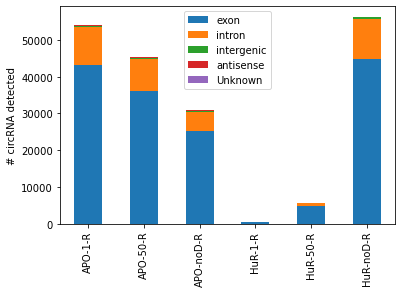

In [9]:
import matplotlib.pyplot as plt
counts.T.sort_index().plot.bar(stacked = True)
plt.ylabel('# circRNA detected')

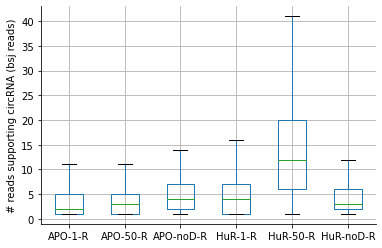

In [18]:
bsj.reindex(sorted(bsj.columns), axis=1).boxplot(showfliers=False)
plt.ylabel('# reads supporting circRNA (bsj reads)')
sns.despine()

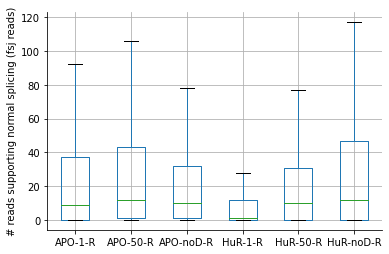

In [19]:
fsj.reindex(sorted(fsj.columns), axis=1).boxplot(showfliers=False)
plt.ylabel('# reads supporting normal splicing (fsj reads)')
sns.despine()

In [20]:
star_log = pd.read_csv('../QC/genome_mapping_stats.csv')

In [27]:
star_log.index = star_log['STAR Log filename'].apply(lambda x: x.split('/')[-1].split('.')[0])

In [33]:
read_count = pd.concat([star_log['Number of input reads'], bsj.sum(axis = 0), fsj.sum(axis=0)],
                       axis = 1).sort_index()
read_count.columns = ['Number of input reads', 'back_splicing_junc', 'forward_splicing_junc']

In [35]:
read_count['back_splicing_junc_frac'] = read_count['back_splicing_junc']/read_count['Number of input reads']
read_count['forward_splicing_junc_frac'] = read_count['forward_splicing_junc']/read_count['Number of input reads']

In [37]:
read_count.dropna()

,Number of input reads,back_splicing_junc,forward_splicing_junc,back_splicing_junc_frac,forward_splicing_junc_frac
APO-1-R,92872075.0,319597.0,10899732.0,0.003441,0.117363
APO-50-R,102610546.0,337719.0,11196493.0,0.003291,0.109116
APO-noD-R,102913087.0,284147.0,20113375.0,0.002761,0.195440
HuR-1-R,104257796.0,2354.0,9289.0,0.000023,0.000089
HuR-50-R,68807026.0,102563.0,3871298.0,0.001491,0.056263
HuR-noD-R,95021856.0,518012.0,11917945.0,0.005452,0.125423
